## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [1]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 

`imolecule` is not correctly installed.


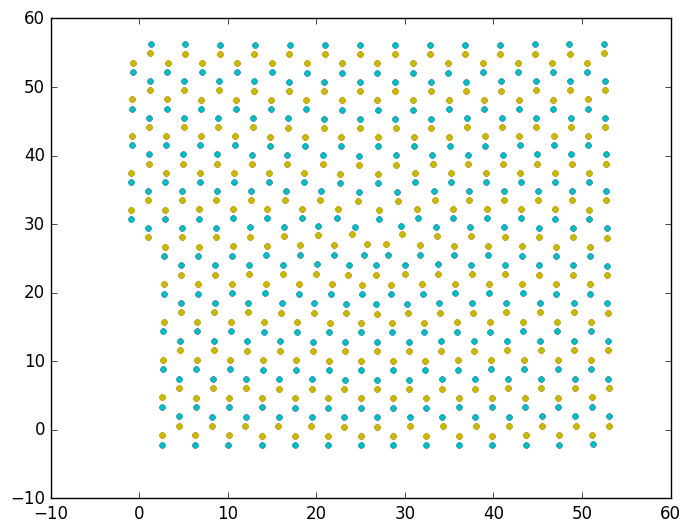

xc: 25.917231297439937 yc: 27.828750000000003 minimum index : [288,329] minimum : 1.3821046874999974 I0 : 329 X12[I0] : [26.8771,27.15]xcore : [26.1771,28.15]xc: 25.917231297439937 yc: 27.82875000000001 minimum index : [572,576,657,661] minimum : 1.3821046874999985 I0 : 661 X12[I0] : [26.8771,27.15]xcore : [26.1771,28.15]

0.0

In [92]:
# isotropic elasticity solution for an silicon edge dislocation 110 direction and 001 slipe plane 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard_110.fcc_edge_geom("Si", 5.1, truncate=false, cle=:isotropic, calc = calc,zDir=1)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=8)
#plot(x[I1], y[I1], "g.", markersize=8)
#plot([xcore[1]], [xcore[2]], "ro")


at2, xcore2 = MaterialsScienceTools.Dislocations_Silicon_hard_110.fcc_edge_geom("Si", 5.1, truncate=false, cle=:isotropic, calc = calc,zDir=2)
X2 = positions(at2) |> mat
x2, y2, z2 = X2[1,:], X2[2,:], X2[3,:] 
I02 = find(X2[3,:] .== 0)
I12 = find(2.> X2[3,:] .> 0)
I22 = find(4.> X2[3,:] .> 2)
I32 = find(6.> X2[3,:] .> 4)
plot(x2[I02], y2[I02], "r.", markersize=8)
plot(x2[I12], y2[I12], "m.", markersize=8)
plot(x2[I22], y2[I22], "y.", markersize=8)
plot(x2[I32], y2[I32], "c.", markersize=8)
#plot([xcore2[1]], [xcore2[2]], "ro")
norm(x[I0]-x2[I02])

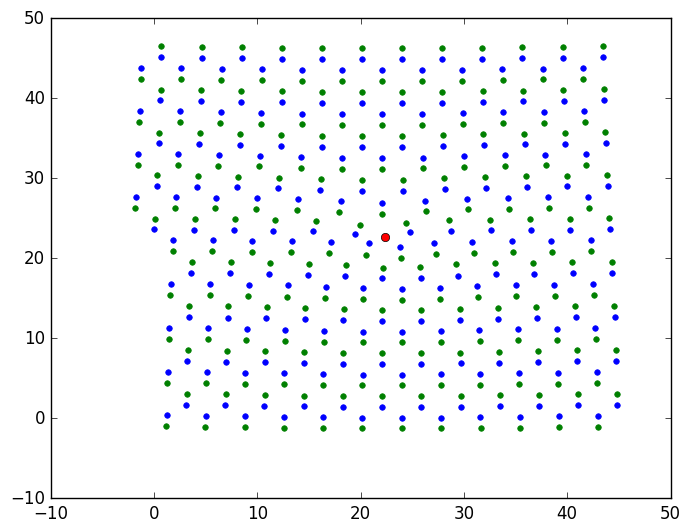

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f58cd416650>

In [15]:
# anisotropic elasticity solution for a silicon edge dislocation with 110 direction and 001 slipe plane 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard_110.fcc_edge_geom("Si", 4.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=8)
plot(x[I1], y[I1], "g.", markersize=8)
plot([xcore[1]], [xcore[2]], "ro")

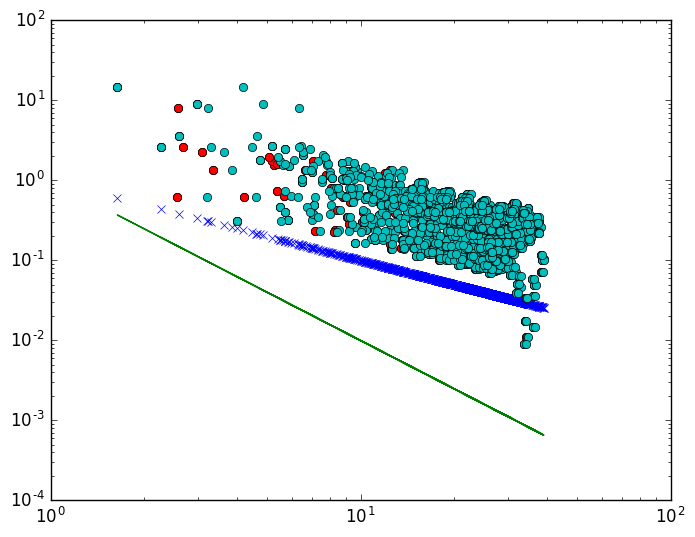

xc: 25.917231297439937 yc: 27.82875000000001 minimum index : [572,576,657,661] minimum : 1.3821046874999985 I0 : 661 X12[I0] : [26.8771,27.15]xcore : [26.1771,28.15]

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f58c374b710>

In [140]:
# anisotropic elasticity solution for a silicon edge dislocation
# checking the decay rate of the forces
reload("MaterialsScienceTools")
calc = StillingerWeber()
calc = lennardjones(r0=rnn("Si"))
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard_110.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc,zDir=2)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, JuLIP.Potentials.StillingerWeber())
xcore = [xcore[1],xcore[2],0]   #,0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
nu = length(f)
pip = zeros(nu,1)
for i=1:nu
    pip[i,1] = norm([x[i];y[i]]-[xcore[1]; xcore[2]])
end
y = r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
loglog(pip,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "bx")
loglog(r,f, "co")

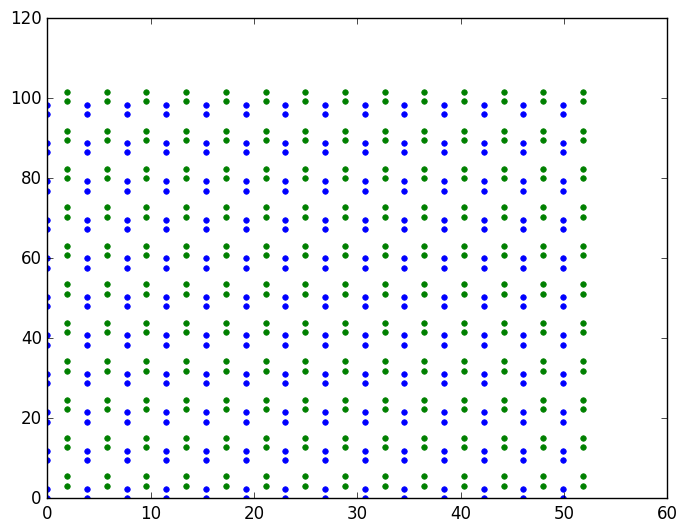

5.43

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3286d2050>

In [12]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.no_dislocation.fcc_edge_geom("Si", 5.1, truncate=false, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=8)
plot(x[I1], y[I1], "g.", markersize=8)
#set_calculator!(at, lennardjones(r0=rnn("Si")))
#set_calculator!(at, JuLIP.Potentials.StillingerWeber())
#F = forces(at)
#print(F)

5.43StaticArrays.SVector{3,Float64}

[[1665.7,-7922.63,-1614.21],[1592.43,-7934.9,-1620.62],[31.3576,-49.684,27.0139],[38.4267,34.4669,16.2699],[1659.52,-7930.7,-1613.41],[1591.99,-7935.42,-1620.51],[31.336,-49.7859,27.1423],[-21.5631,-23.068,34.8186],[1659.52,-7930.7,-1613.41],[1591.99,-7935.42,-1620.51],[31.1349,-50.0024,27.1165],[-21.5631,-23.068,34.8186],[1632.06,-7956.6,-1624.14],[-36.3117,-47.461,21.2147],[-22.2302,-44.4841,15.5139],[-31.5903,-30.5524,35.5333],[10.2516,-0.487043,6.75184],[-4.82452,-6.51666,12.6218],[3.88792,-10.724,7.92745],[-13.8566,-14.2169,5.95462],[10.5944,-0.144138,6.7428],[-4.82452,-6.51666,12.6218],[3.88792,-10.724,7.92745],[-13.183,-13.516,5.05381],[10.5944,-0.144138,6.7428],[-4.82452,-6.51666,12.6218],[3.88792,-10.724,7.92745],[-13.183,-13.516,5.05381],[10.5944,-0.144138,6.7428],[-4.82452,-6.51666,12.6218],[3.88792,-10.724,7.92745],[-13.183,-13.516,5.05381],[10.5944,-0.144138,6.7428],[-4.82452,-6.51666,12.6218],[4.19195,-10.4719,7.93659],[-13.183,-13.516,5.05381],[31.9679,19.6124,10.1179],[

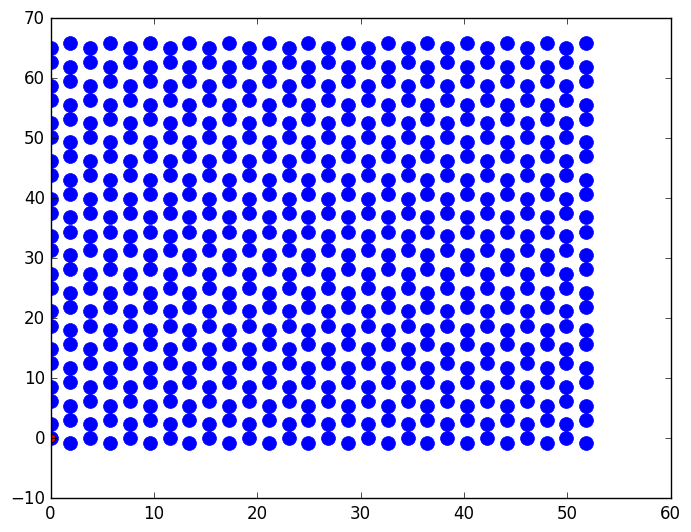

],[-13.6093,-13.6093,5.09722],[6.61498,6.61498,10.9573],[-6.09245,-6.09245,13.5316],[0.674747,0.674747,10.8669],[-13.6093,-13.6093,5.09722],[6.61498,6.61498,10.9573],[-6.09232,-6.09267,13.5324],[0.674747,0.674747,10.8669],[-13.6093,-13.6093,5.09722],[6.61498,6.61498,10.9573],[-6.09232,-6.09267,13.5324],[0.674747,0.674747,10.8669],[-13.6094,-13.6095,5.09729],[6.61498,6.61498,10.9573],[-6.09232,-6.09267,13.5324],[0.674747,0.674747,10.8669],[-13.6094,-13.6095,5.09729],[6.47128,6.47128,10.7725],[-9.34517,-9.34552,11.3384],[-6.11232,-6.11232,8.13271],[-13.9558,-13.9558,5.10646],[8.36222,8.36222,10.1634],[-5.66842,-5.66842,13.5153],[0.682088,0.682088,10.8321],[2.44799,2.44799,0.686166],[6.61498,6.61498,10.9573],[-6.09245,-6.09245,13.5316],[0.674747,0.674747,10.8669],[-13.6093,-13.6093,5.09722],[6.61498,6.61498,10.9573],[-6.09245,-6.09245,13.5316],[0.674747,0.674747,10.8669],[-13.6093,-13.6093,5.09722],[6.61498,6.61498,10.9573],[-6.09245,-6.09245,13.5316],[0.674747,0.674747,10.8669],[-13.6093

In [82]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.no_dislocation.fcc_edge_geom("Si", 5.1, truncate=false, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
#I0 = find(X[3,:] .== 0)
#I1 = find(X[3,:] .> 0)
plot(x,y, "b.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")
index = length(X[1,:])
T = [-1/sqrt(2) -1/sqrt(3) 1/sqrt(6); 1/sqrt(2) -1/sqrt(3) 1/sqrt(6); 0 1/sqrt(3) 2/sqrt(6)]
Y = zeros(3, index)
for i=1:index
    Y[:,i]= T*X[:,i]
end
set_positions!(at, Y)

#X[1,:], X[2,:], X[3,:] = 
set_calculator!(at, JuLIP.Potentials.StillingerWeber())
F = forces(at)
print(F)

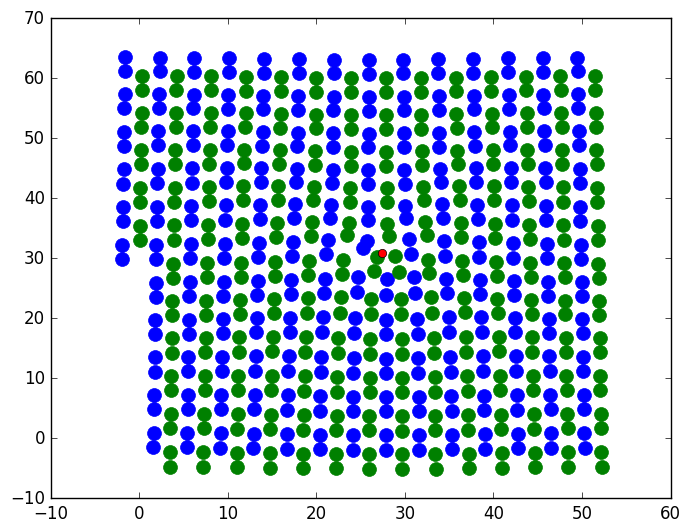

616-element Array{StaticArrays.SVector{3,Float64},1}:
 [1.60404,-1.48835,0.0]    
 [3.46151,-4.6837,1.10839] 
 [1.62996,0.895422,0.0]    
 [3.48891,-2.28938,1.10839]
 [1.67224,4.85632,0.0]     
 [3.53538,1.69431,1.10839] 
 [1.69671,7.22404,0.0]     
 [3.5631,4.07799,1.10839]  
 [1.73572,11.1537,0.0]     
 [3.60792,8.03541,1.10839] 
 [1.75825,13.5016,0.0]     
 [3.63364,10.399,1.10839]  
 [1.79526,17.4004,0.0]     
 ⋮                         
 [49.6789,48.8426,0.0]     
 [51.6524,45.6895,1.10839] 
 [49.6486,51.1685,0.0]     
 [51.6265,48.0364,1.10839] 
 [49.5964,55.0259,0.0]     
 [51.5811,51.9273,1.10839] 
 [49.565,57.332,0.0]       
 [51.5527,54.2505,1.10839] 
 [49.514,61.1686,0.0]      
 [51.5044,58.1078,1.10839] 
 [49.4851,63.4693,0.0]     
 [51.4755,60.4162,1.10839] 

In [18]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")
positions(at)

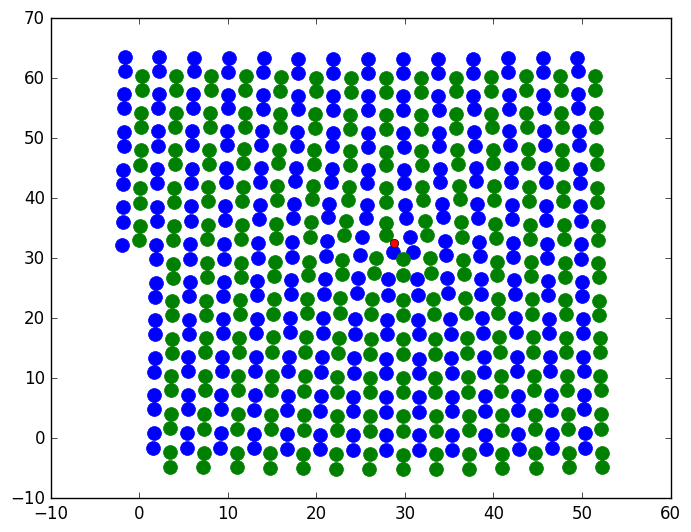

616-element Array{StaticArrays.SVector{3,Float64},1}:
 [1.60215,-1.51358,0.0]    
 [3.46277,-4.70601,1.10839]
 [1.6268,0.869015,0.0]     
 [3.48873,-2.314,1.10839]  
 [1.66715,4.8294,0.0]      
 [3.53274,1.6666,1.10839]  
 [1.69058,7.19785,0.0]     
 [3.55905,4.04924,1.10839] 
 [1.72803,11.1305,0.0]     
 [3.60174,8.00692,1.10839] 
 [1.74963,13.4811,0.0]     
 [3.62633,10.372,1.10839]  
 [1.78488,17.3849,0.0]     
 ⋮                         
 [49.6865,48.8766,0.0]     
 [51.662,45.7155,1.10839]  
 [49.6544,51.2032,0.0]     
 [51.6348,48.0657,1.10839] 
 [49.5989,55.0583,0.0]     
 [51.5871,51.9591,1.10839] 
 [49.5653,57.3617,0.0]     
 [51.5572,54.2821,1.10839] 
 [49.511,61.1926,0.0]      
 [51.5059,58.1368,1.10839] 
 [49.4803,63.4899,0.0]     
 [51.4752,60.4426,1.10839] 

In [5]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")
positions(at)

In [31]:
using JuLIP.Solve: minimise!
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 7.1, truncate=false, cle=:anisotropic, calc = calc)
set_calculator!(at, JuLIP.Potentials.StillingerWeber())
#set_constraint!(at, FixedCell(at))
#set_calculator!(at, calc)
#relaxed = minimise!(at)
#X = positions(at) |> mat
#x, y, z = X[1,:], X[2,:], X[3,:] 
#I0 = find(X[3,:] .< 0)
#I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "g.", markersize=20)
#plot(x[I1], y[I1], "g.", markersize=20)
#plot([xcore[1]], [xcore[2]], "ro")
F = forces(at)
print(F)

[0.84762 0.0976505 0.218964 -3.30115e-13 -1.37641e-13 6.10216e-14; 0.0976505 0.915711 0.0538722 1.43708e-12 3.77912e-12 -1.23607e-12; 0.218964 0.0538722 0.115395 -1.20943e-12 2.85045e-12 -1.3891e-12; 0.0 -6.51234e-13 -1.09899e-12 0.214194 2.6751e-17 3.0294e-13; 3.83381e-12 4.50432e-12 4.42136e-12 -1.43615e-12 0.261246 -6.84825e-17; 1.23094e-13 1.65944e-13 -1.36896e-12 1.98727e-12 0.0 0.0855372]

StaticArrays.SVector{3,Float64}[[-0.143698,0.208241,-0.0742816],[0.0144743,0.162632,-0.00379419],[-0.0586148,-0.123732,-0.0231454],[0.0797027,-0.216733,0.103121],[-0.157032,0.188854,-0.082527],[-0.100068,0.195566,0.0977263],[-0.0436106,-0.0780934,-0.0153118],[0.0947706,-0.200504,0.100227],[-0.171821,0.145862,-0.0920448],[-0.129031,0.15666,0.100657],[-0.0243754,-0.00443475,-0.00611076],[0.127463,-0.160526,0.101134],[-0.181847,0.0816024,-0.0993922],[-0.162427,0.087968,0.103598],[-0.00174571,0.0882902,0.00382639],[0.159591,-0.0872228,0.0984903],[-0.175333,0.025931,-0.0977456],[-0.19053,0.00304811,0.101131],[0.0227342,0.159254,0.0146242],[0.178335,0.00727439,0.0862331],[-0.14587,0.0237708,-0.0828969],[-0.198126,-0.0479291,0.0837319],[0.0501169,0.160107,0.0285205],[0.177716,0.0690511,0.059435],[-0.0862579,0.525177,-0.0701769],[-0.185092,-0.0248514,0.048531],[0.119965,0.0684708,0.0684619],[0.172949,0.0515345,0.0204057],[-0.0668019,0.14552,-0.0400125],[-0.178589,0.0529793,0.00246006],[0.12204

5.43

[0.945782 0.477765 0.477765 -3.507e-13 4.96777e-13 2.33376e-12; 0.477765 0.945782 0.477765 5.42502e-12 2.38185e-12 1.449e-12; 0.477765 0.477765 0.945782 2.66817e-12 6.8494e-12 6.24816e-13; 3.40915e-13 6.03598e-12 3.16725e-12 0.685403 2.80508e-12 1.62669e-12; 8.51602e-13 2.58322e-12 6.92655e-12 2.84714e-12 0.685403 3.17763e-13; 2.67507e-12 1.9637e-12 9.00123e-13 4.89282e-13 6.47772e-13 0.685403][1.509 0.191 0.353 0.23 -0.0 0.0; 0.191 1.671 0.191 0.0 0.0 0.0; 0.353 0.191 1.509 -0.23 0.0 -0.0; 0.23 -0.0 -0.23 0.415 0.0 0.0; 0.0 0.0 0.0 0.0 0.578 0.23; 0.0 -0.0 -0.0 0.0 0.23 0.415][392.138,450.942][-6.14282,1.07326,4.57919][-0.18838,4.84113,6.70044][-6.1528,-1.08395,4.55968][-0.159166,-6.89363,5.85179][-6.16806,1.09238,4.56601][-0.18856,4.84105,6.70046][-6.1527,-1.08382,4.55966][-0.161309,-4.84124,6.70043][-6.16817,1.09236,4.56608][-0.188742,4.84096,6.70048][-6.1526,-1.08368,4.55964][-0.161131,-4.84116,6.70045][-6.16827,1.09234,4.56614][-0.188926,4.84087,6.7005][-6.15249,-1.08354,4.55961][

Excessive output truncated after 524288 bytes.

[-0.0192711,5.25604,6.80531][0.0189971,-5.25583,6.80519][0.0188214,-5.25619,6.80526][-0.0194468,5.25567,6.80524][-0.0196444,5.25588,6.80536][0.0193631,-5.25567,6.80524][0.019187,-5.25604,6.80531][-0.0198203,5.2555,6.80529][-0.0200243,5.2557,6.8054][0.0197354,-5.25548,6.80528][0.0195592,-5.25587,6.80535][-0.0202002,5.2553,6.80533][-0.0204107,5.2555,6.80545][0.0201142,-5.25528,6.80532][0.019938,-5.25569,6.80539][-0.0205863,5.25508,6.80537][-0.0208035,5.25527,6.80549][0.0204992,-5.25506,6.80536][0.0203233,-5.25548,6.80543][-0.0209786,5.25485,6.80541][-0.0212025,5.25503,6.80552][0.0208903,-5.25482,6.80539][0.0207149,-5.25525,6.80547][-0.0213768,5.25459,6.80544][-0.0216076,5.25476,6.80556][0.0212874,-5.25455,6.80542][0.0211127,-5.255,6.8055][-0.0217809,5.25431,6.80547][-0.0220186,5.25448,6.80559][0.0216903,-5.25426,6.80544][0.0215167,-5.25472,6.80553][-0.0221905,5.25401,6.8055][-0.0224353,5.25416,6.80561][0.0220988,-5.25395,6.80546][0.0219265,-5.25442,6.80555][-0.0226056,5.25368,6.80552][-0

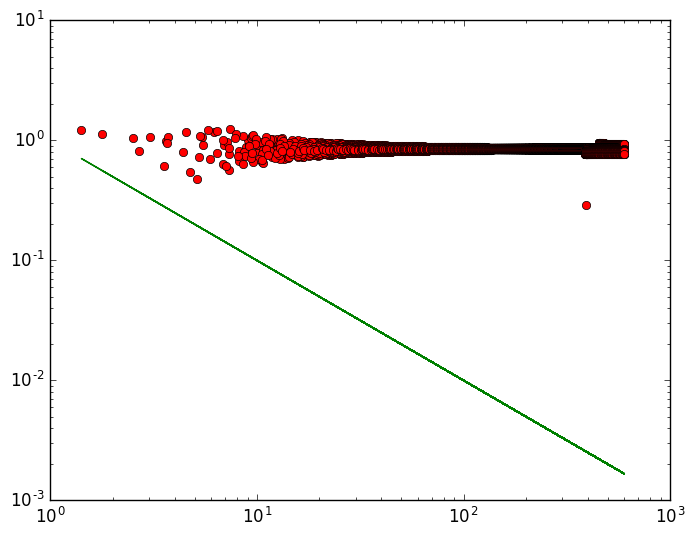

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc0fc3d5f50>

In [100]:
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 100.1, truncate=false, cle=:anisotropic, calc = calc)
set_calculator!(at, calc)
print(xcore)
xcore = [390.218,450.158,0]
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
for g in F
    print(g)
end
f = [1/10*norm(g) for g in F]
y = r.^(-2)
z = r.^(-1)
print(log(y[1]))
#z = r[5:22]
#w = f[5:22]
#(log(w[5])-log(w[1]))/(log(z[5])-log(z[1]))
loglog(r,f, "ro")
loglog(r,z, "g-")

In [14]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

In [38]:
E = eye(3)
X = [1 2 3; 4 5 6; 0 0 0]
[:,1]

3-element Array{Int64,1}:
 1
 4
 0

In [35]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
atu = set_pbc!(bulk("Si", cubic=true) * 2, true)
set_calculator!(atu, JuLIP.Potentials.StillingerWeber())
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

6×6 Array{Float64,2}:
  0.946  0.478   0.478  -0.0    -0.0    -0.0  
  0.478  0.946   0.478   0.0     0.0     0.0  
  0.478  0.478   0.946   0.0     0.0    -0.0  
  0.0    0.0     0.0     0.685   0.0    -0.0  
 -0.0    0.0     0.0     0.0     0.685  -0.0  
 -0.0    0.0    -0.0    -0.0    -0.0     0.685

In [28]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

1.6260000000000001
for isotropy, this number should match Cvoigt[6,6] = 4.212


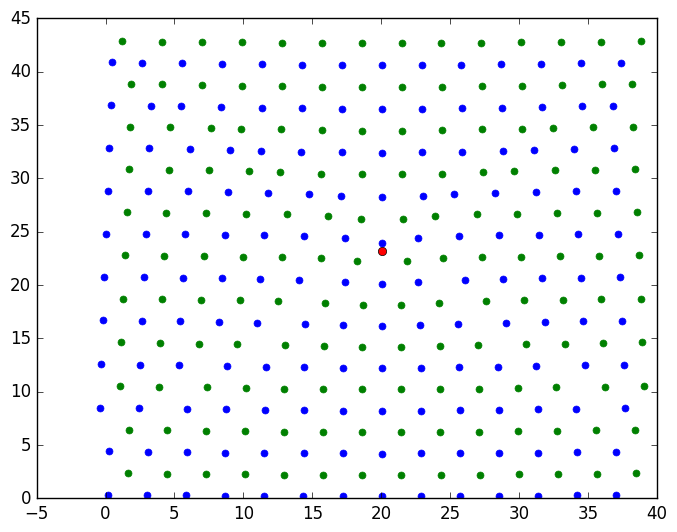

[9.06513 3.22679 0.640383 9.04038e-12 2.31394e-11 5.09541e-12; 3.22679 6.47872 3.22679 1.95123e-11 1.85895e-11 -2.50376e-11; 0.640383 3.22679 9.06513 4.03481e-12 1.6125e-11 9.85372e-12; -1.97975e-13 -1.15648e-11 -8.70597e-12 4.21237 3.65517e-11 5.23295e-12; 3.23239e-11 1.7435e-11 1.84599e-11 2.95573e-11 1.62596 2.21326e-11; -1.33424e-11 -6.62897e-11 -1.42423e-11 2.36874e-11 1.03838e-11 4.21237](λ,ϕ) = (1.0876050097921104,0.9521339217080068)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4bfc446c50>

In [54]:
reload("MaterialsScienceTools")
Dis = MaterialsScienceTools.Dislocations
calc = lennardjones(r0=rnn("Al"))
at, xcore = Dis.fcc_edge_geom("Al", 5.1, truncate=false, cle=:anisotropic, calc=calc, TOL=1e-4)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")

In [8]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

1.6260000000000001

In [9]:
MaterialsScienceTools.Dislocations.u_edge([], [], 1.0, Cv)

10.82(λ,ϕ) = (1.0,1.1890457085836792)


LoadError: LoadError: MethodError: no method matching atan(::Array{Any,1})
Closest candidates are:
  atan(!Matched::BigFloat) at mpfr.jl:610
  atan(!Matched::Complex{Float16}) at math.jl:480
  atan(!Matched::Float16) at math.jl:479
  ...
while loading In[9], in expression starting on line 1

In [67]:
pi/2

1.5707963267948966